# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import linregress
import re
import pandas as pd
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

# Looking at energy change matrix

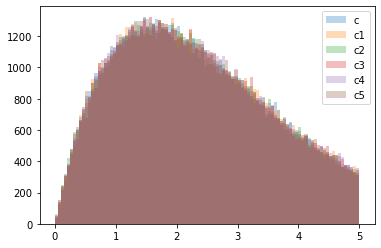

In [7]:
c = np.loadtxt("/home/qtaylor/BH_extremal/change/changes.txt")
c1 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_1.txt")
c2 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_2.txt")
c3 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_3.txt")
c4 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_4.txt")
c5 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_5.txt")
plt.hist(c, bins = 100, range = (0,5), alpha = 0.3, label = "c")
plt.hist(c1, bins = 100, range = (0,5), alpha = 0.3, label = "c1")
plt.hist(c2, bins = 100, range = (0,5), alpha = 0.3, label = "c2")
plt.hist(c3, bins = 100, range = (0,5), alpha = 0.3, label = "c3")
plt.hist(c4, bins = 100, range = (0,5), alpha = 0.3, label = "c4")
plt.hist(c5, bins = 100, range = (0,5), alpha = 0.3, label = "c5")
plt.legend()
plt.show()

# 100 mp

## Turning on the bias

In [12]:
bias = np.array((0,1,5,10,15,20,25,30,35,40,45,50))
b_array = np.empty((5000,len(bias)))
a1 = np.empty((2000,len(bias)))

for i, val in enumerate(bias):
    x = np.loadtxt(f"/home/qtaylor/BH_extremal/Outputs/bias{val}_M_100.txt", delimiter = ',')
    #a1[:,i] = np.where(np.abs(x[:,4]) == 1)
    b_array[:,i] = x[:,2]

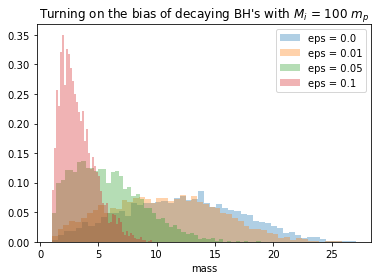

In [40]:
for i, val in enumerate(bias[0:4]):
    plt.hist(b_array[b_array[:,i] > 1,i], bins = 50, density = True, alpha = 0.35, label = f"eps = {val/100}")
plt.legend()
plt.xlabel("mass")
plt.title("Turning on the bias of decaying BH's with $M_i$ = 100 $m_p$")
plt.savefig(f"/home/qtaylor/BH_extremal/Outputs/Bias_Plotsv1.png")
plt.show()

### Zooming in on change

In [3]:
zoom = np.arange(1,11,1)
b2_array = np.empty((5000,len(zoom)))

for i, val in enumerate(zoom):
    x = np.loadtxt(f"/home/qtaylor/BH_extremal/Outputs/bias{val}_M_100.txt", delimiter = ',')
    #a1[:,i] = np.where(np.abs(x[:,4]) == 1)
    b2_array[:,i] = x[:,2]

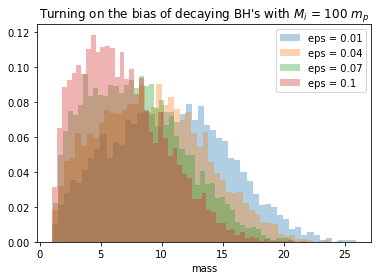

In [51]:
for i, val in enumerate(zoom[::3]):
    plt.hist(b2_array[b2_array[:,i] > 1,i], bins = 50, density = True, alpha = 0.35, label = f"eps = {val/100}")
plt.legend()
plt.xlabel("mass")
plt.title("Turning on the bias of decaying BH's with $M_i$ = 100 $m_p$")
plt.savefig(f"/home/qtaylor/BH_extremal/Outputs/Bias_Plots_zoom.png")
plt.show()

In [54]:
zoom[-1]

10

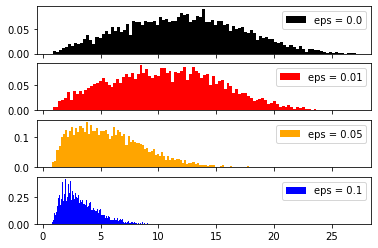

In [21]:
fig, ax = plt.subplots(4, sharex = True)
ax[0].hist(b_array[:,0], bins = 100, density = True, color = 'black', label = f"eps = {bias[0]/100}")
ax[1].hist(b2_array[:,0], bins = 100, density = True, color = 'red', label = f"eps = {zoom[0]/100}")
ax[2].hist(b2_array[:,4], bins = 100, density = True, color = 'orange', label = f"eps = {zoom[4]/100}")
ax[3].hist(b2_array[:,-1], bins = 100, density = True, color = 'blue', label = f"eps = {zoom[-1]/100}")
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
#fig.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(f"/home/qtaylor/BH_extremal/Outputs/Bias_Plots_stacked.png")

# 100mp Analysis

In [3]:
mass100 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/M100.txt", delimiter = ',')
f100 = mass100[:,2]
a100 = np.where(mass100[:,4] == 1)
avg100 = np.mean(f100[a100])
# print("Number of Extremal BH's for M_i = 100 mp:", len(fmass100[a100]))
# print(a100)

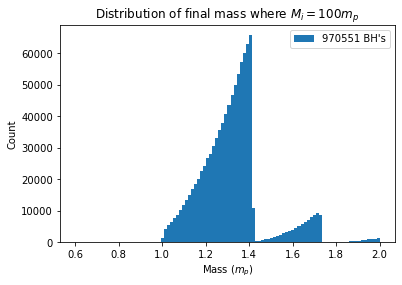

In [13]:
plt.hist(f100[a100], bins = 100, density = False, alpha = 1, range = (0.6,2), label = f"{N100} BH's")
#plt.hist(f100, bins = 100, density = False, color = 'red', alpha = 0.3, range = (0.6,2))
#plt.axvline(avg100, color = 'black', label = f"{avg100:.2f}")
plt.legend()
plt.title("Distribution of final mass where $M_i = 100 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/100BH.png")
plt.show()

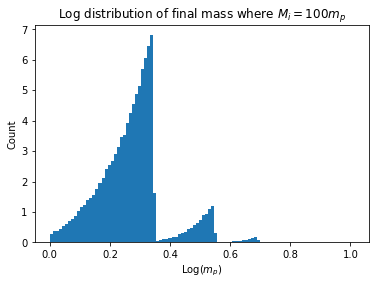

In [8]:
plt.hist(np.log(f100[a100]), bins = 100, density = True)
#plt.axvline(np.mean(fmass200[fmass200 > 1]), color = 'black', label = np.mean(fmass200[fmass200 > 1]) )
#plt.legend()
plt.title("Log distribution of final mass where $M_i = 100 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log100BH.png")
plt.show()

## Finding Eta

/tmp/ipykernel_1614/1898408573.py:7: RuntimeWarning: divide by zero encountered in log
  eta100[index] = np.log(np.sum(m100[m100 > i]))


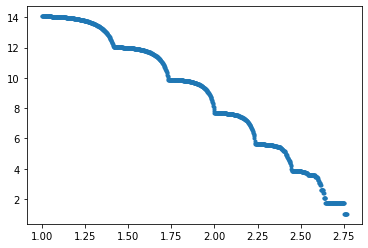

In [9]:
m100 = f100[a100]
max100 = max(m100)
min100 = min(m100)
mprime = np.linspace(min100,max100,1000)
eta100 = np.empty(1000)
for index, i in enumerate(mprime):
    eta100[index] = np.log(np.sum(m100[m100 > i]))
plt.plot(mprime, eta100, '.')
#plt.yscale("log")

In [22]:
print(f"Maximum mass value: {max100:.2f}mp")

Maximum mass value: 2.77mp


## Fit

In [10]:
s100 = (eta100[-2] - max(eta100)) / (min(mprime) - max(mprime))
cept = max(eta100)
l100 = cept - s100 * (mprime - 1)

In [11]:
N100 = len(m100)
beta100 = np.exp(-cept)*N100
print(f"Number of extremal BH's: {N100}, beta: {beta100}, slope: {s100}")

Number of extremal BH's: 970551, beta: 0.7559257309901618, slope: 7.379455506268823


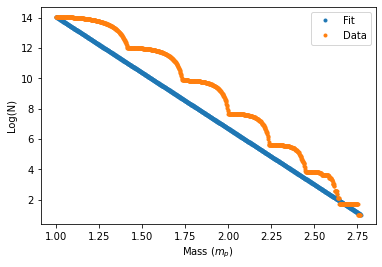

In [16]:
plt.plot(mprime, l100, '.', label = 'Fit')
plt.plot(mprime, eta100,  '.', label = 'Data')
plt.legend()
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Log(N)")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/eta100.png")
plt.show()

# 1000 mp

In [34]:
mass1k = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/M_1000.txt", delimiter = ',')
f1k = mass1k[:,2]
a1k = np.where(mass1k[:,4] == 1)
avg1k = np.mean(f1k[a1k])
#print("Number of Extremal BH's for M_i = 1000 mp:", len(f1k[a1k]))

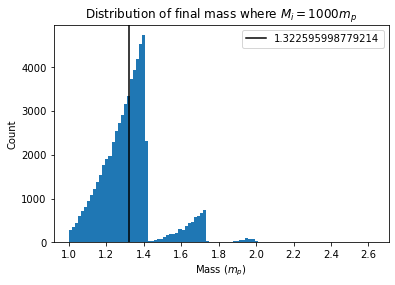

In [35]:
plt.hist(f1k[a1k], bins = 100, density = False)
plt.axvline(avg1k, color = 'black', label = avg1k)
plt.legend()
plt.title("Distribution of final mass where $M_i = 1000 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/1000BH.png")
plt.show()

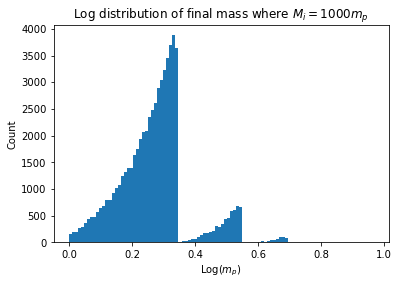

In [38]:
plt.hist(np.log(f1k[a1k]), bins = 100)
# plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
# plt.legend()
plt.title("Log distribution of final mass where $M_i = 1000 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log1000BH.png")
plt.show()

## Finding Eta

/tmp/ipykernel_174/2466891388.py:7: RuntimeWarning: divide by zero encountered in log
  eta1k[index] = np.log(np.sum(m1k[m1k > i]))


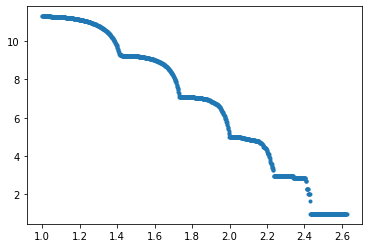

In [58]:
m1k = f1k[a1k]
max1k = max(m1k)
min1k = min(m1k)
mprime1k = np.linspace(min1k,max1k,1000)
eta1k = np.empty(1000)
for index, i in enumerate(mprime):
    eta1k[index] = np.log(np.sum(m1k[m1k > i]))
plt.plot(mprime, eta1k, '.')
#plt.yscale("log")

## Fit

In [59]:
s1k = (eta1k[-2] - max(eta1k)) / (min(mprime1k) - max(mprime1k))
cept1k = max(eta1k)
l1k = cept1k - s1k * (mprime - 1)

In [60]:
N1k = len(m1k)
beta = np.exp(-cept1k) * N1k
print(beta, s1k)

0.756098048543415 6.361614099086728


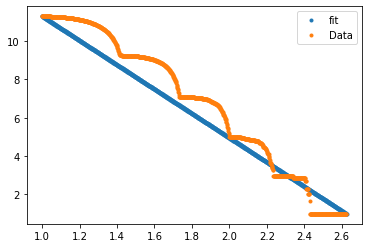

In [61]:
plt.plot(mprime, l1k, '.', label = 'fit')
plt.plot(mprime, eta1k,  '.', label = 'Data')
plt.legend()
plt.show()

# Tracking Evolution

In [31]:
J = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/shortJ_100.txt", delimiter = ',')
M = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/shortM_100.txt", delimiter = ',')

In [43]:
def Moft(t, M0, E): #Might be incorrect.
    return np.sqrt(4*M0*np.pi - E*t)/(np.sqrt(2*np.pi))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


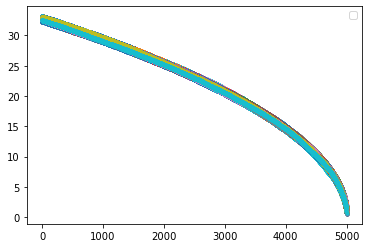

In [42]:
t = np.arange(0,5000)
for i in range(1000):
    plt.plot(M[i], '.')
#plt.plot(Moft(t, 100, 2.7), '--', label = "Deterministic Equation")
plt.legend()
plt.show()

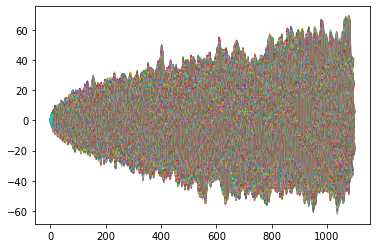

In [61]:
plt.plot(M**2, J, '-')
plt.show()

In [53]:
np.shape(M)

(1000, 5000)

## Investigating the strange features

In [ ]:
st = np.empty(1000)
for i in range(1000):
    st = np.where(J[i, J[i,:] > ])

# Test

In [23]:
N = 100
x = np.random.randint(0,10,(10,N))
r = np.random.randint(1,6,10)

In [28]:
for i in range(10):
    y = x[i,:r[i]]
    
    print(y, y[-1:], y[:-2])

[5 7 9] [9] [5 7]
[0] [0] []
[4 8 0 4] [4] [4 8 0]
[8 4] [4] [8]
[8 8 2 1 8] [8] [8 8 2 1]
[9] [9] []
[4 5 8 2] [2] [4 5 8]
[2 7 8] [8] [2 7]
[3 4 3 1] [1] [3 4 3]
[8 3] [3] [8]
